In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
zoo_df = pd.read_csv('Zoo.csv')
zoo_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Exploring Dataset (EDA)

In [3]:
zoo_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

- No Missing values found in the dataset.

In [6]:
zoo_df.duplicated().sum()

np.int64(0)

- No duplicate rows found in the dataset.

In [7]:
zoo_df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

- Looking at each type of animal in the 'Type' column in the Dataset:

- 1 = Mammals (examples: aardvark, antelope, fruitbat, squirrel, vampire)
- 2 = Birds (examples: chicken, crow, hawk, ostrich, sparrow)
- 3 = Reptiles (examples: pitviper, slowworm, tortoise, tuatara)
- 4 = Fish (examples: bass, carp, pike, tuna, stingray)
- 5 = Amphibians (examples: frog, newt, toad)
- 6 = Insects (examples: flea, honeybee, moth, wasp)
- 7 = Invertebrates (examples: clam, crab, lobster, starfish, worm)

- So each number in the type column represents a different class/category of animal:

1. Mammals
2. Birds
3. Reptiles
4. Fish
5. Amphibians
6. Insects
7. Invertebrates

# Data Visualization

<Axes: xlabel='type', ylabel='count'>

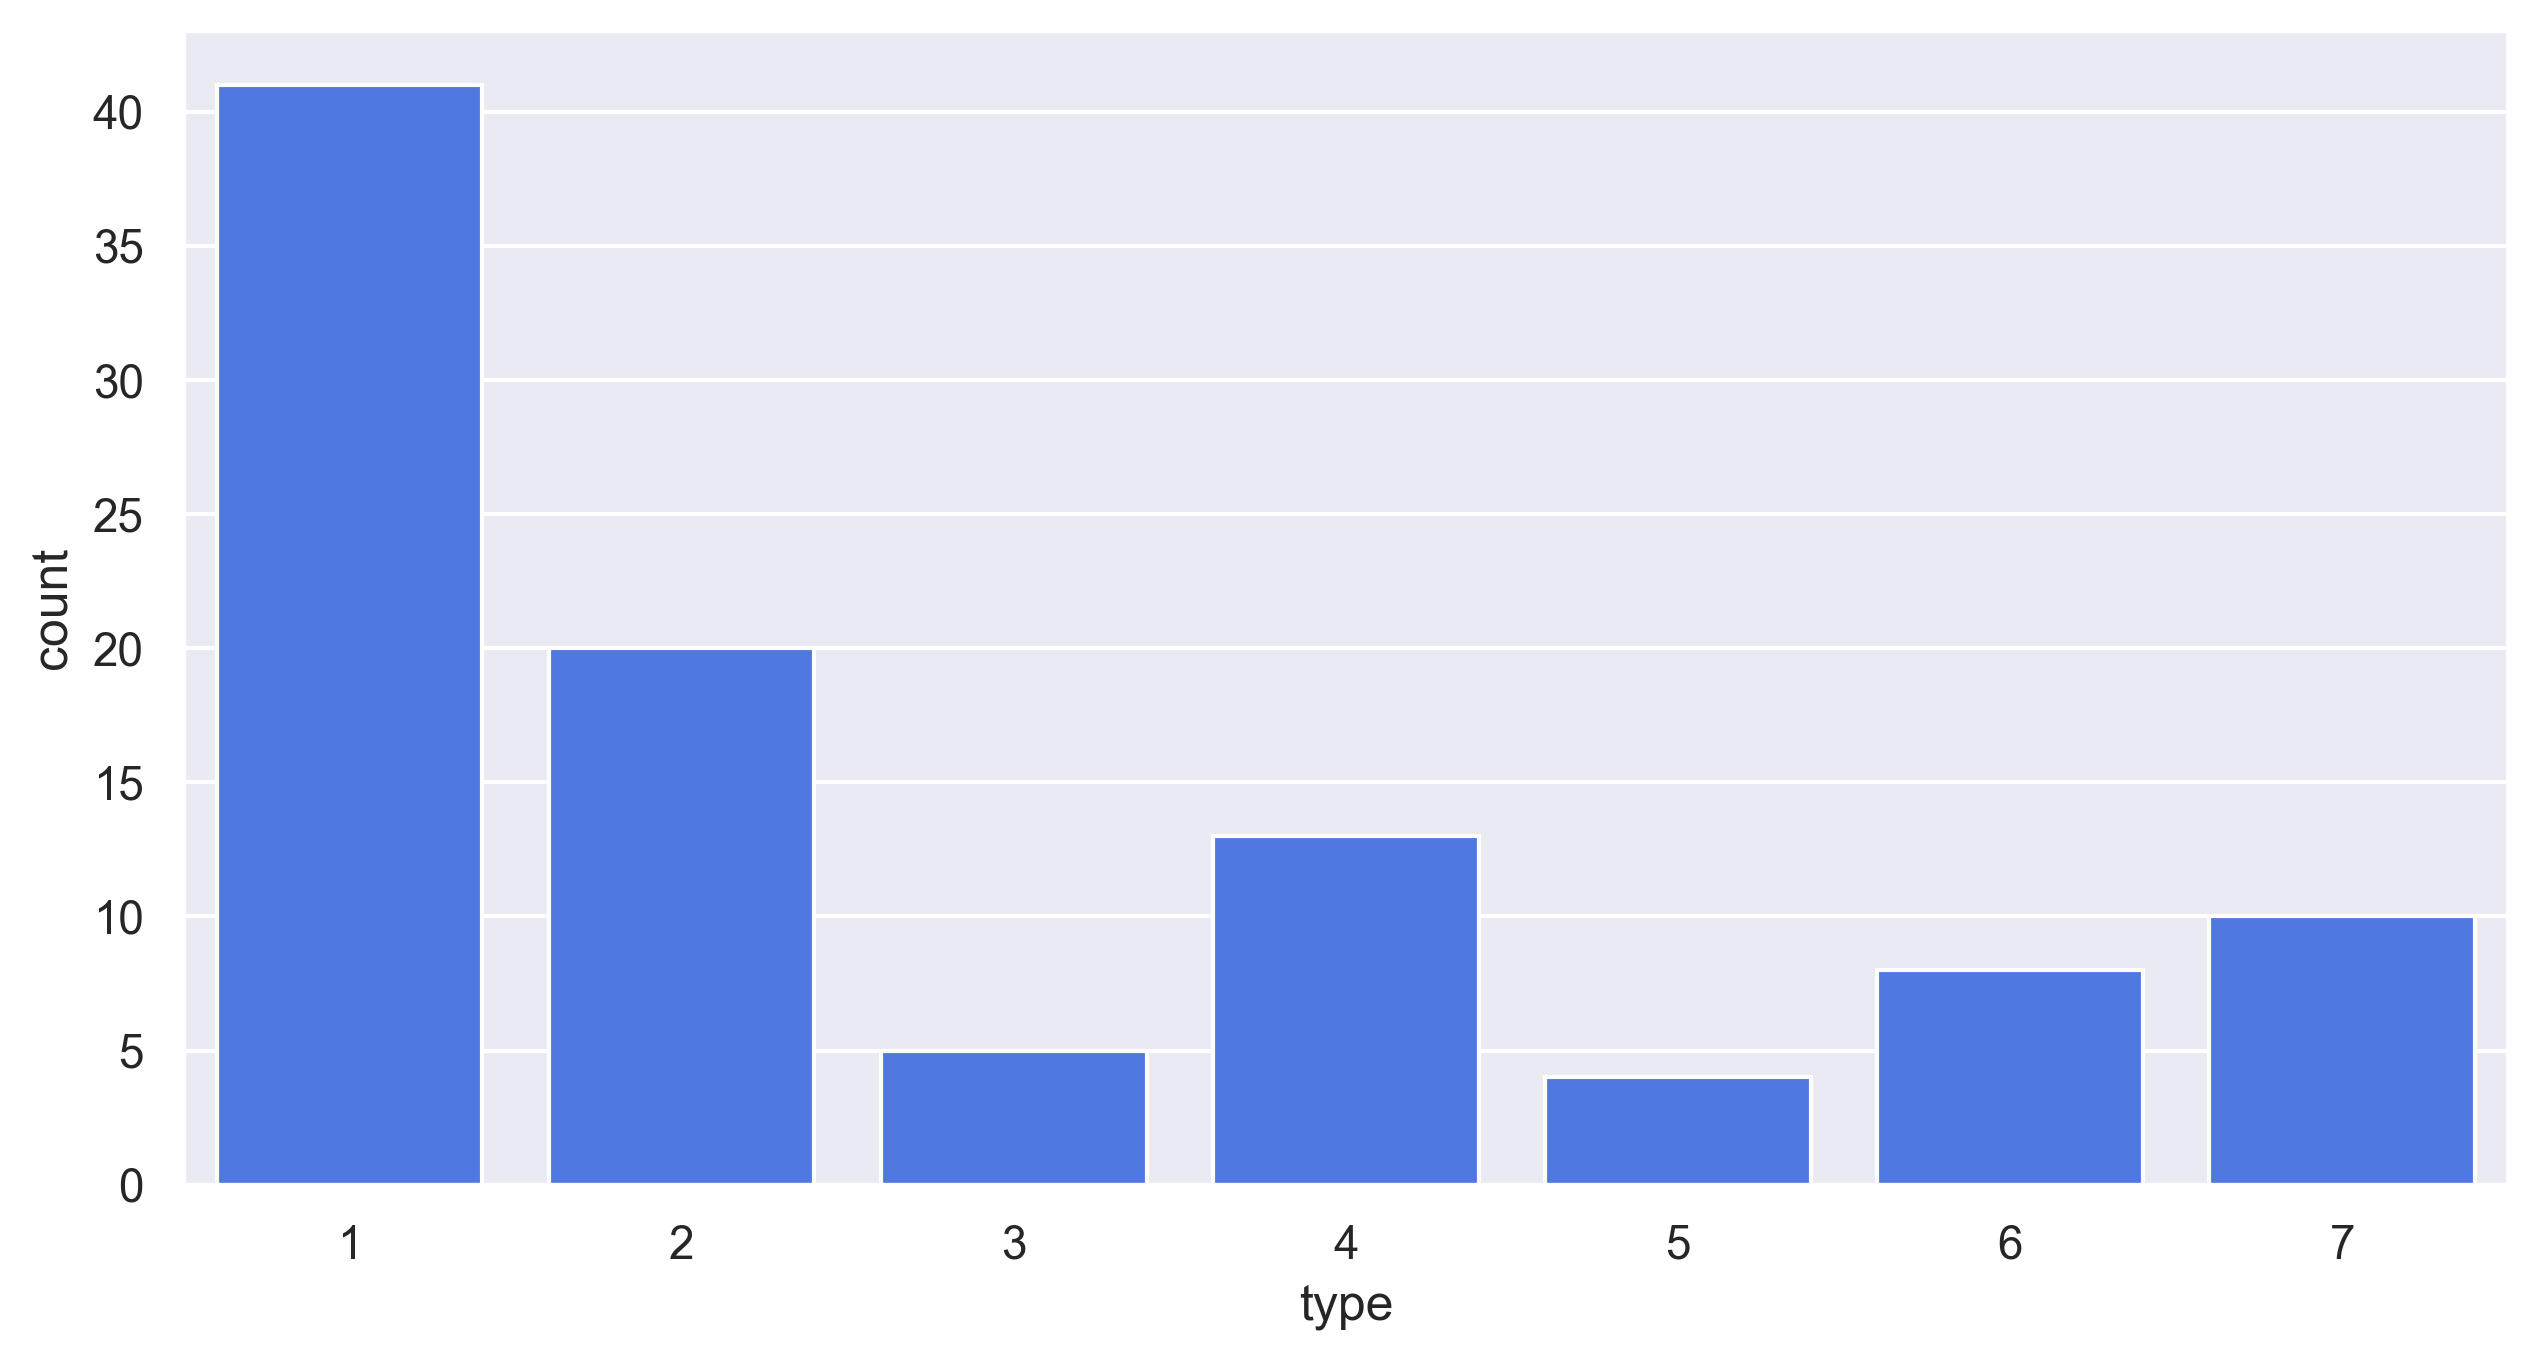

In [8]:
sns.countplot(x = zoo_df['type'])

- There are more 'Mammals' & 'Birds' in the type column.

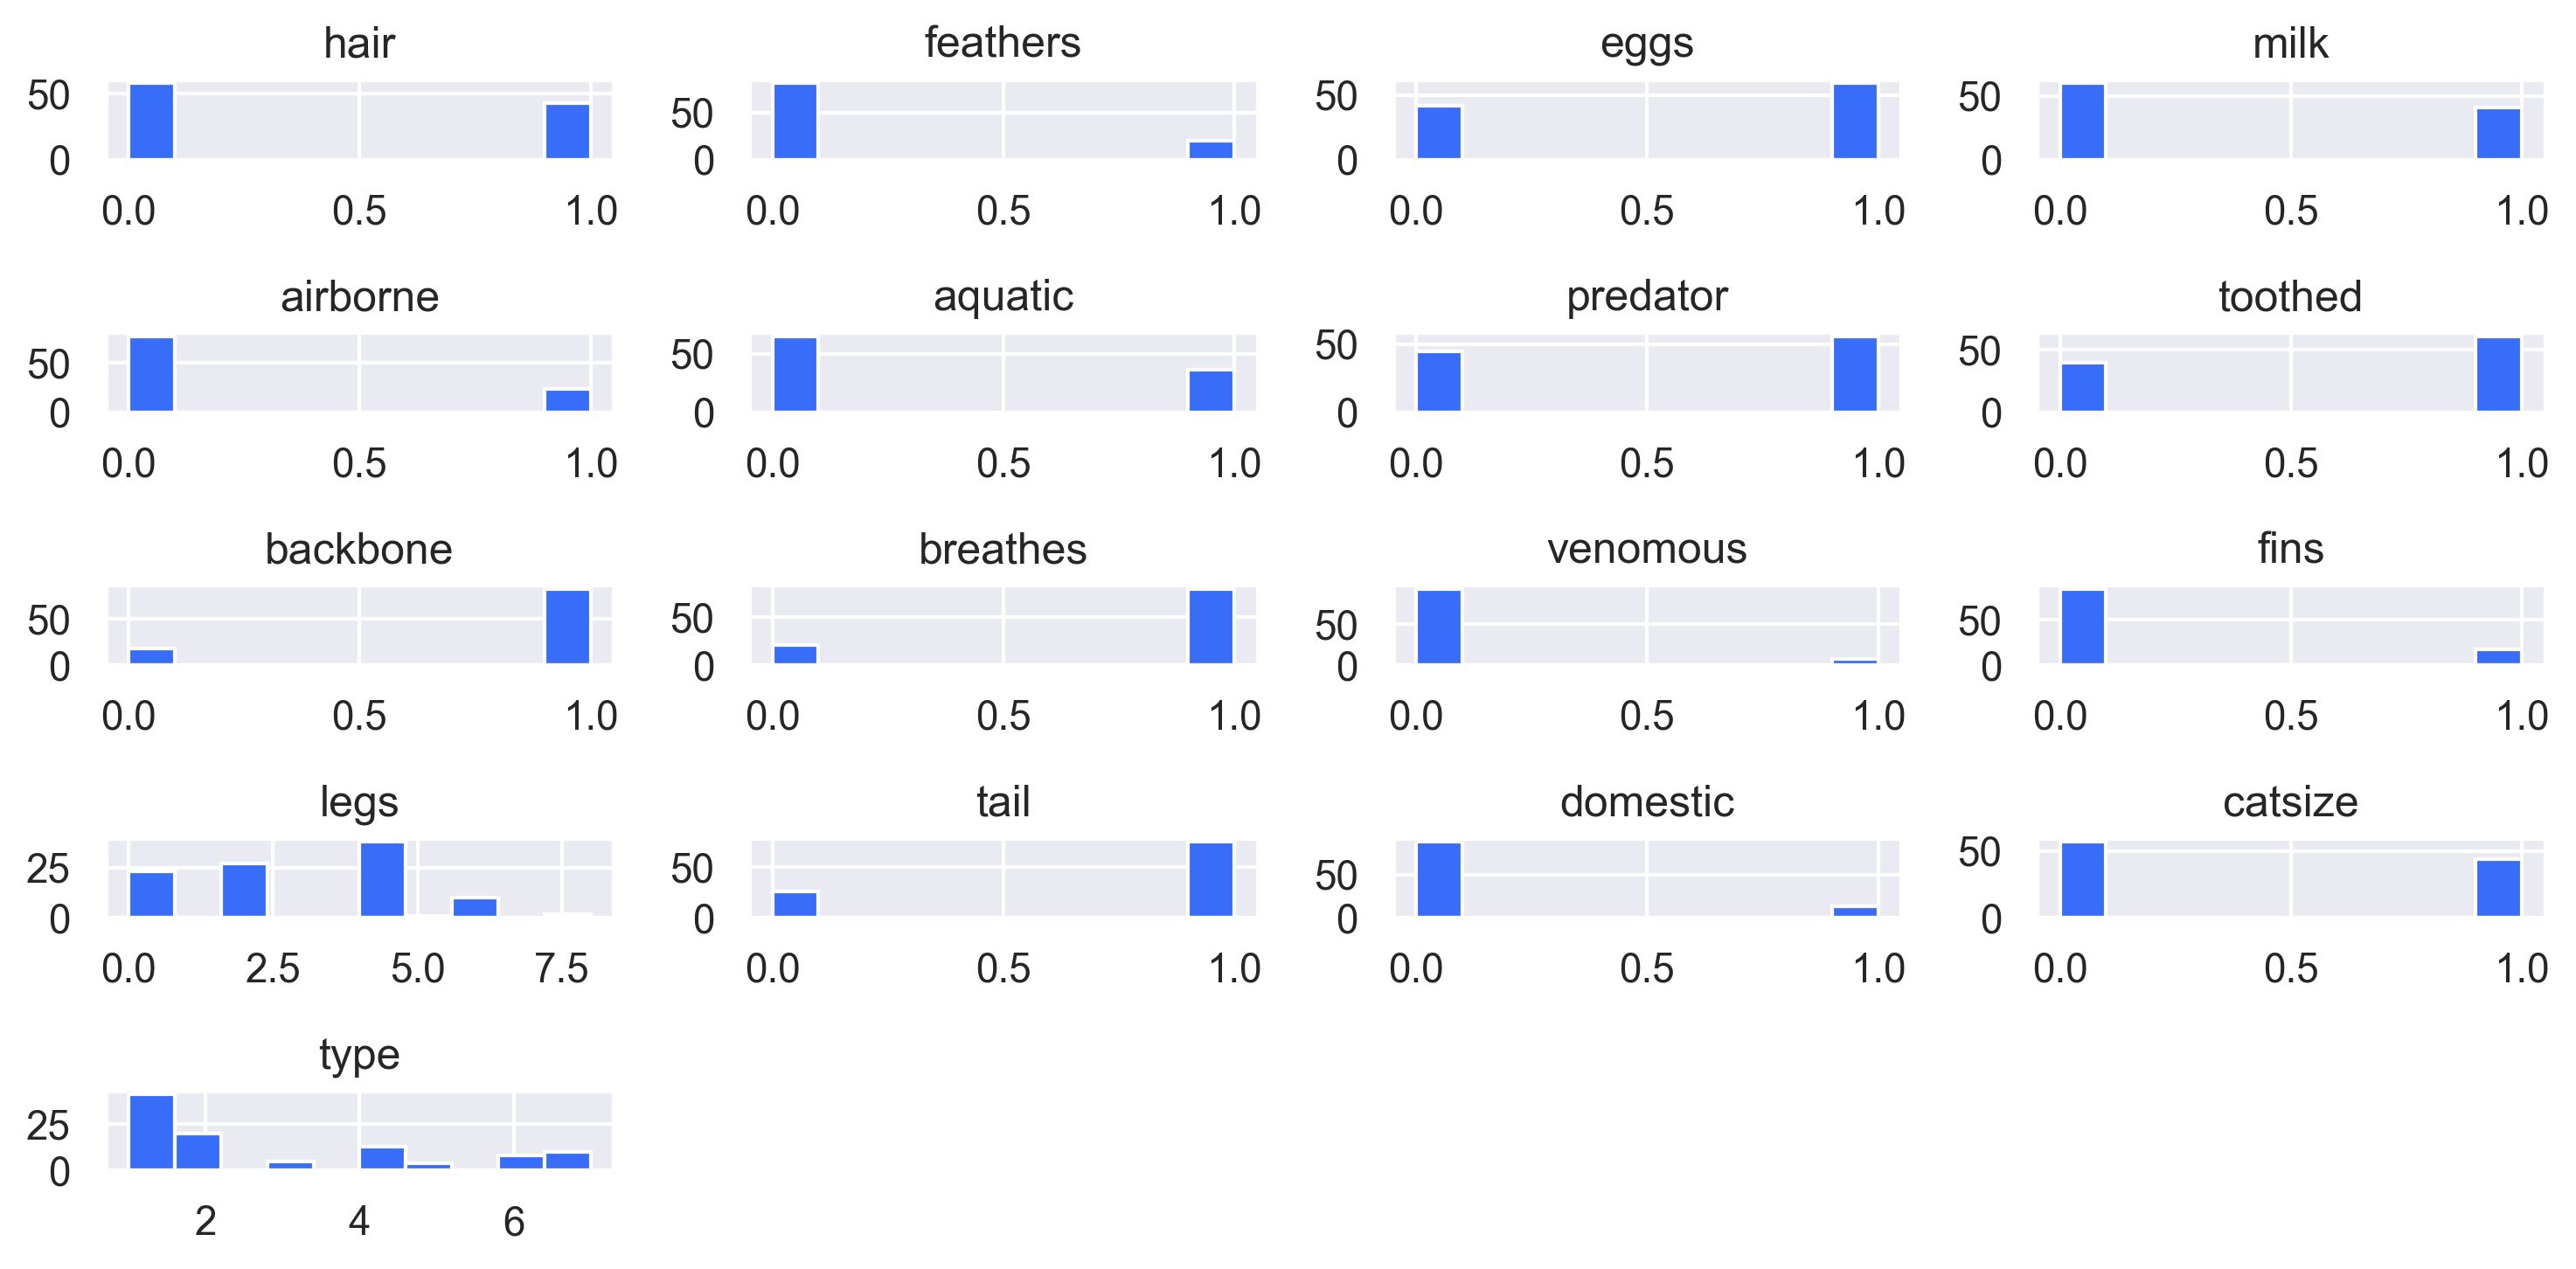

In [9]:
zoo_df.hist()
plt.tight_layout()

<Axes: xlabel='legs', ylabel='type'>

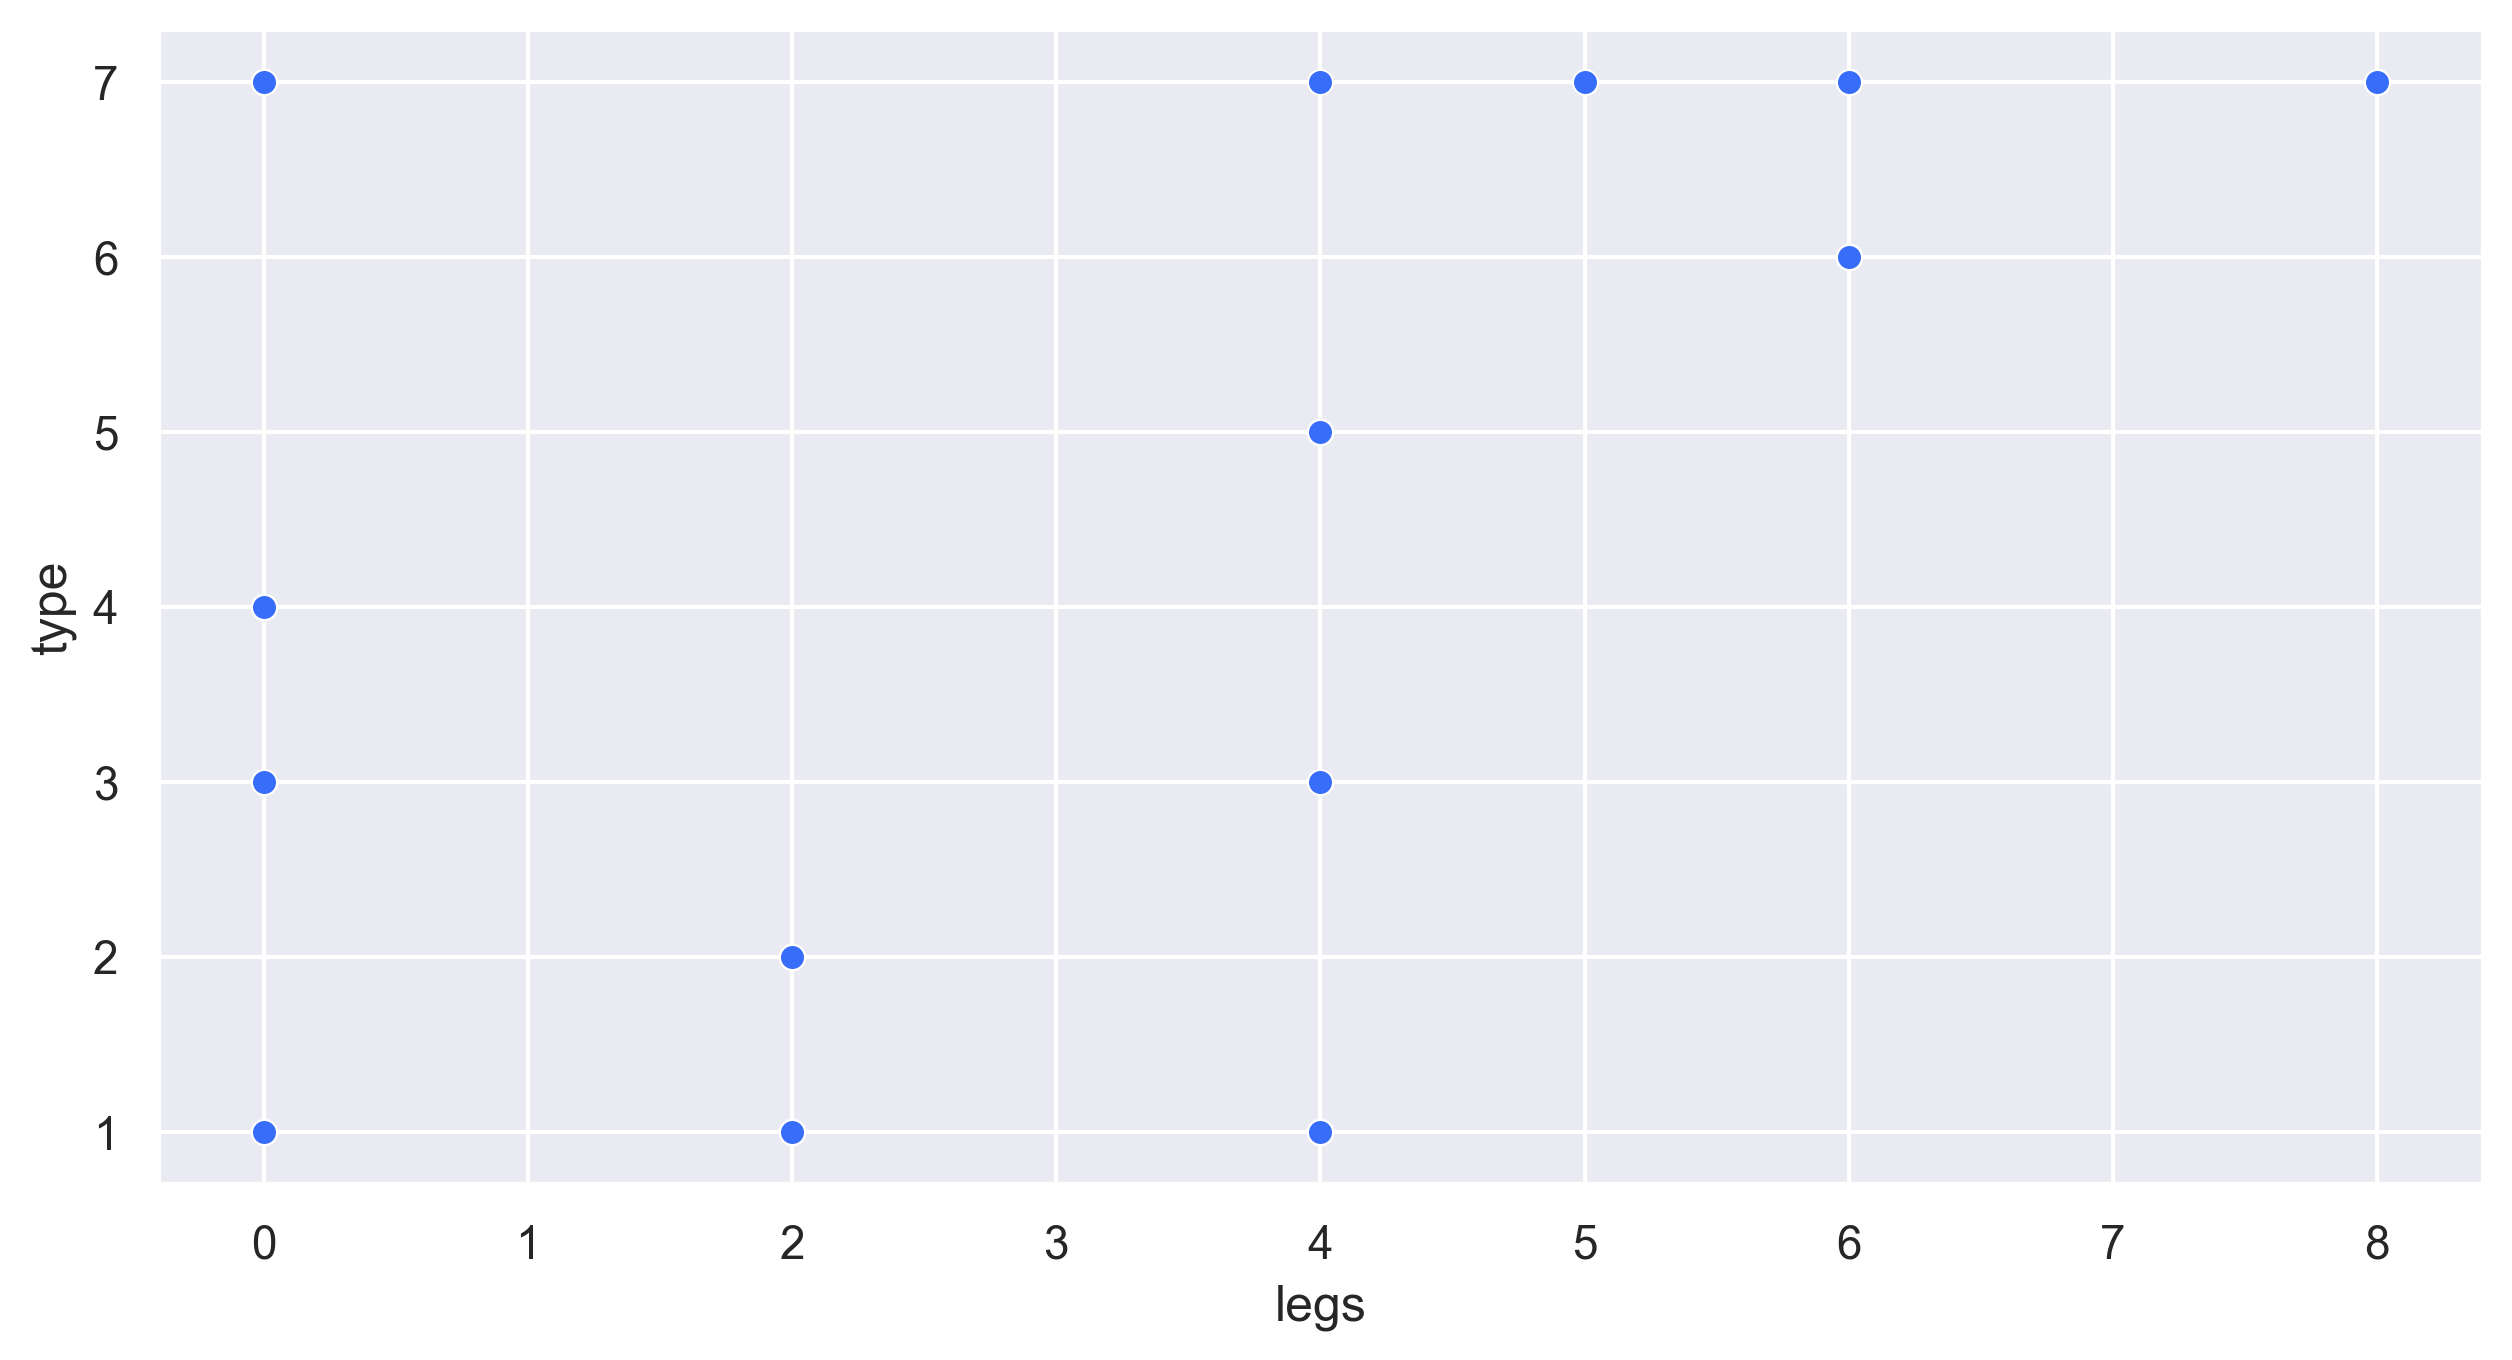

In [10]:
# Plotting Scatter Plot for 'legs' and 'type' columns.

sns.scatterplot(x = zoo_df['legs'], y = zoo_df['type'], palette='rainbow') 

In [11]:
# Dropping 'animal name' column as it is not required for the model.

zoo_df.drop(columns=['animal name'], axis=1, inplace=True)

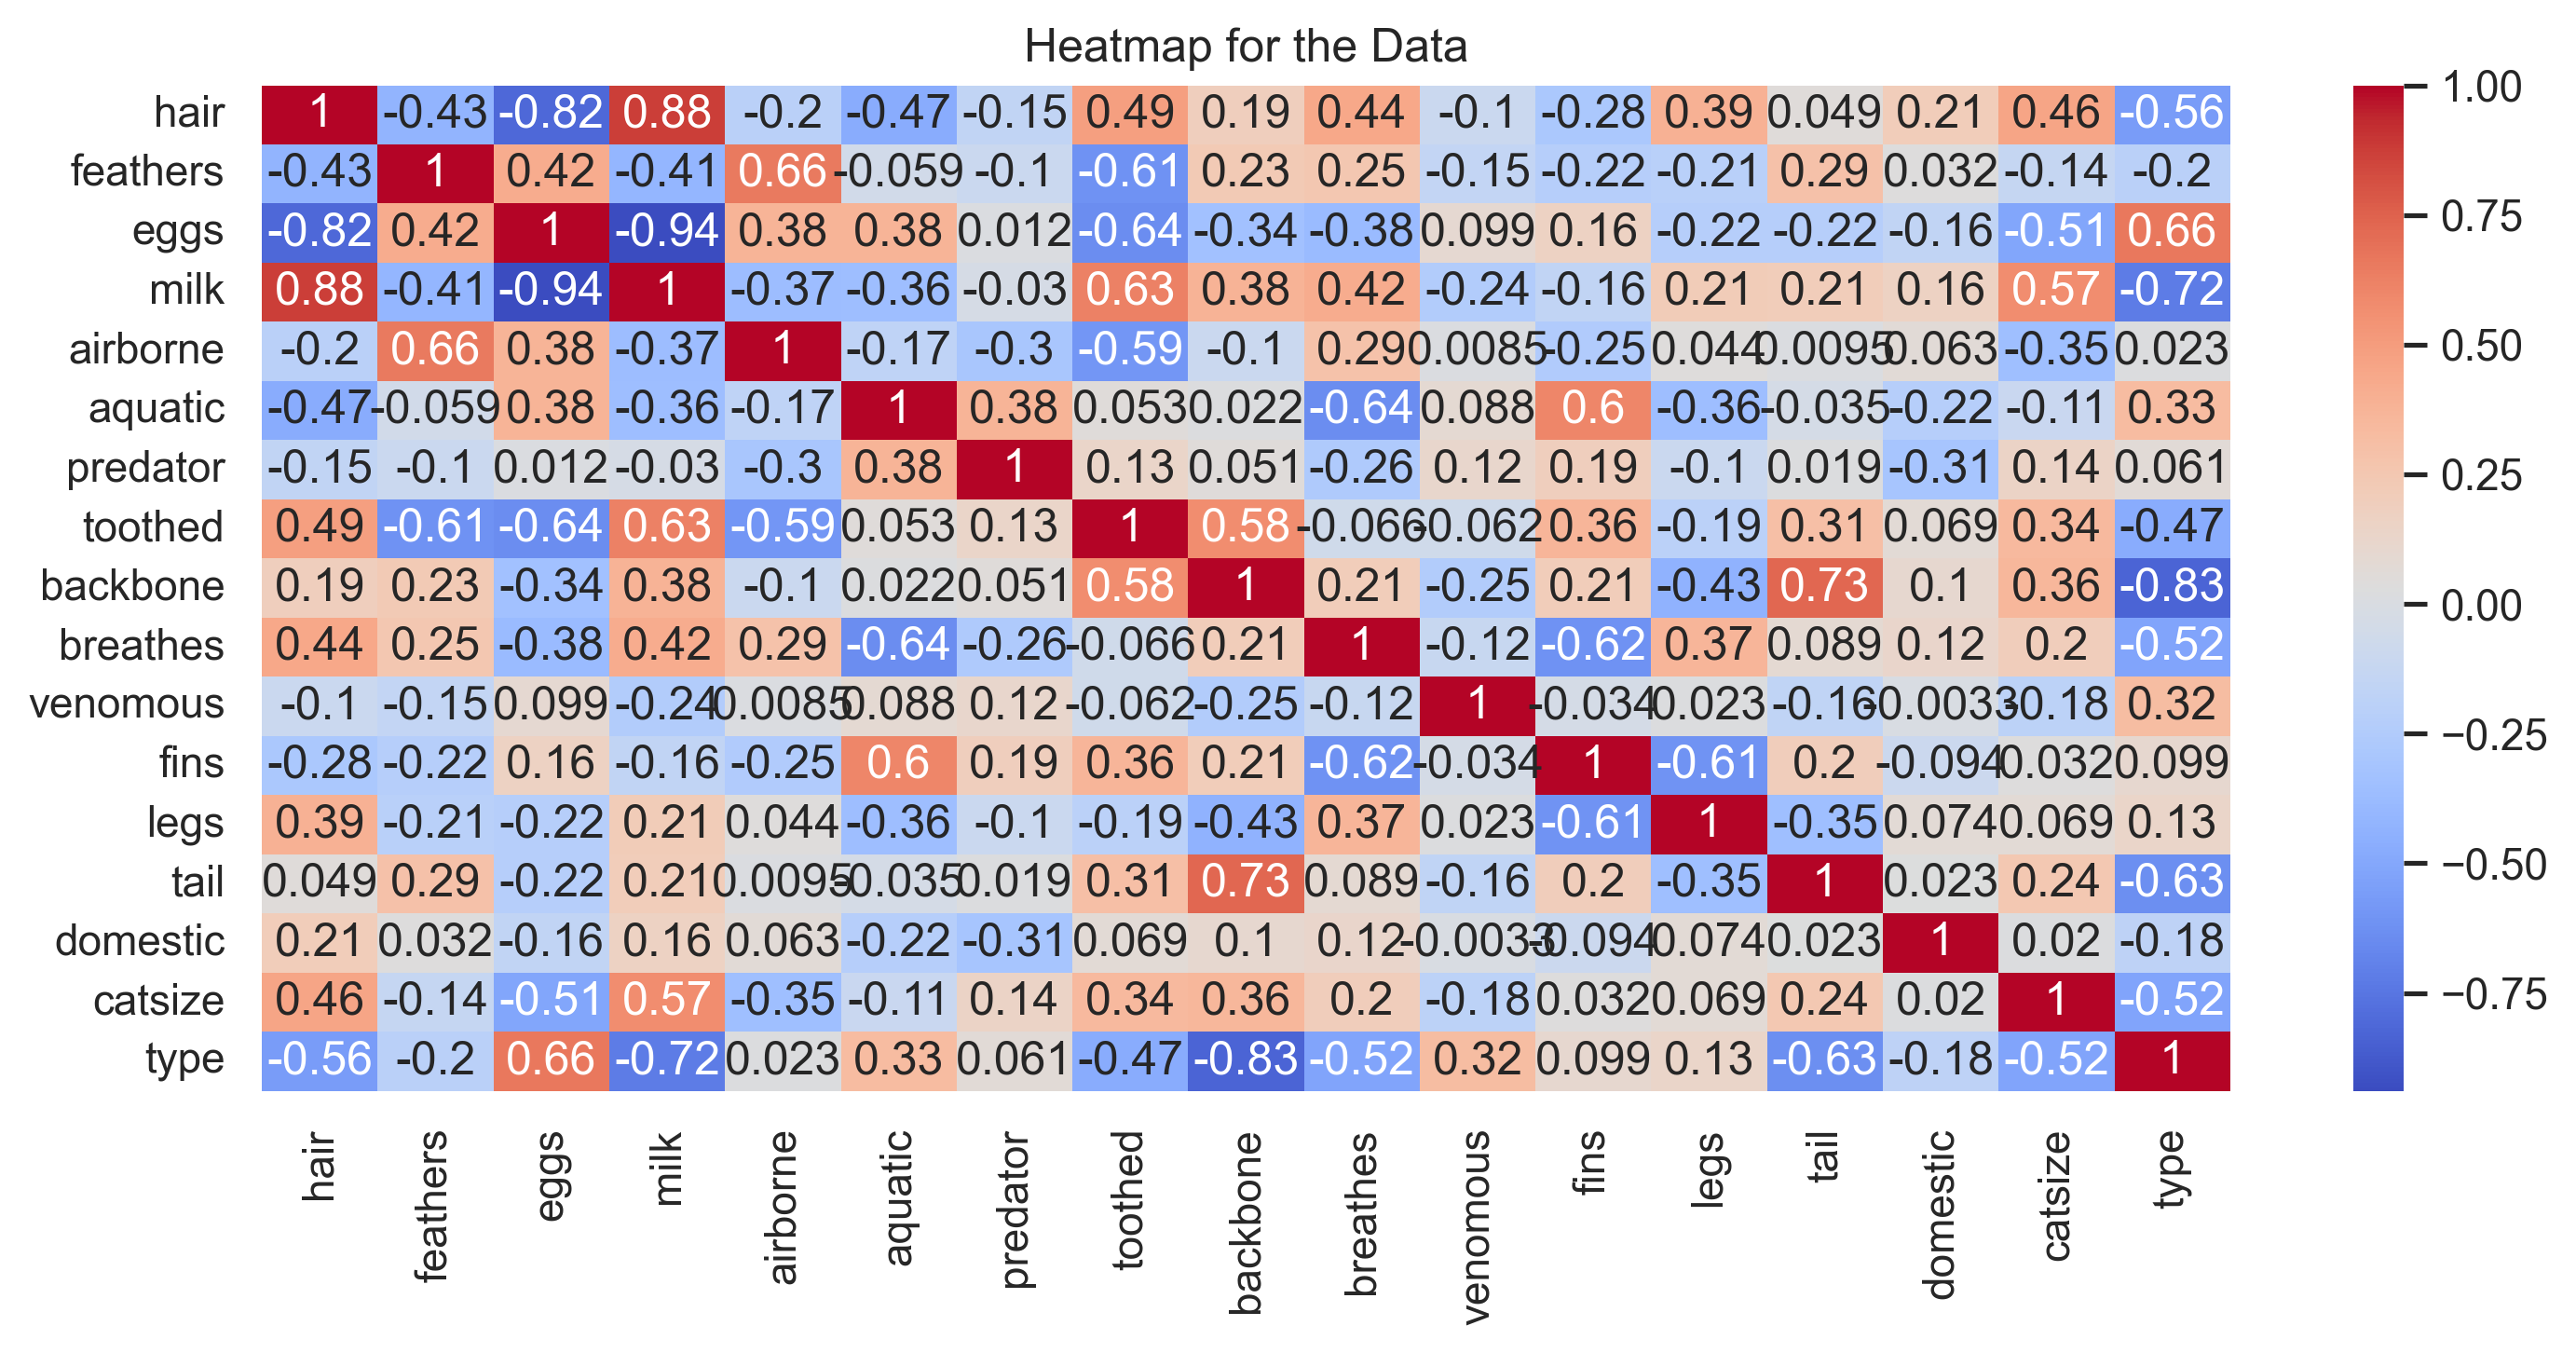

In [13]:
# Plotting Heatmap for the dataset to check correlations.

sns.heatmap(zoo_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for the Data')
plt.tight_layout()

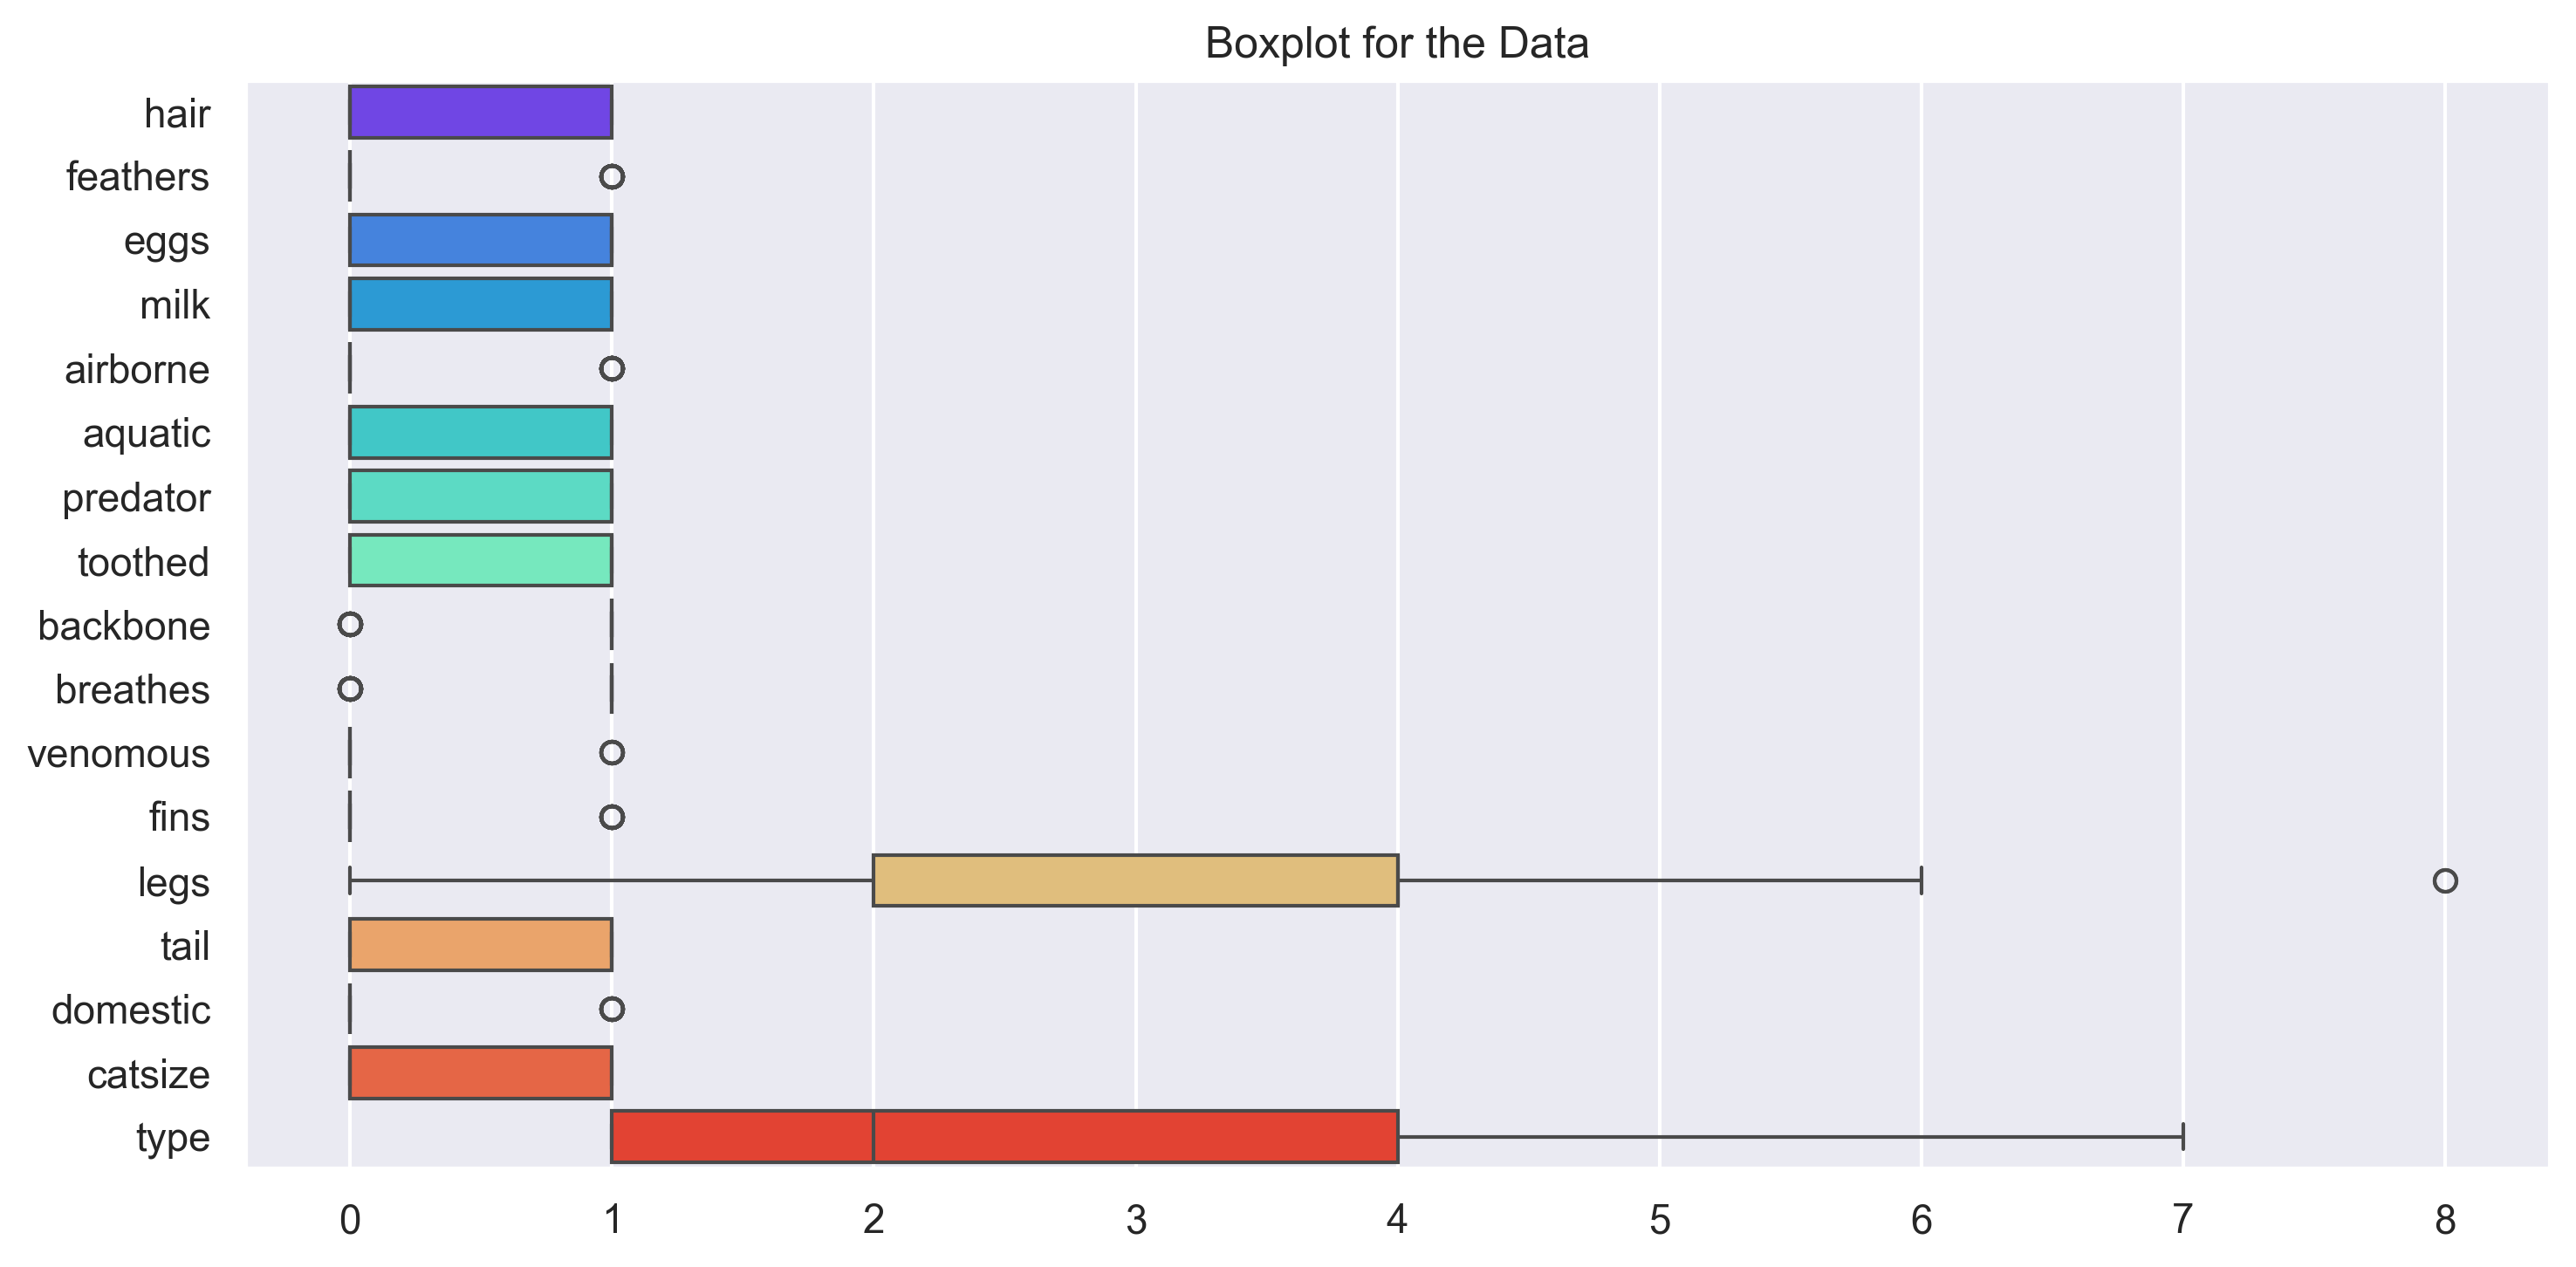

In [16]:
# Plotting Boxplot for the dataset to identify outliers.

sns.boxplot(data=zoo_df, orient='h', palette='rainbow')
plt.title('Boxplot for the Data')
plt.tight_layout() 

# Data Pre-processing 

In [17]:
# Dealing with Outliers using Capping method.

def capping(data):
    for col in data.columns:
        if data[col].dtype != 'object':
            upper_limit = data[col].quantile(0.75)
            lower_limit = data[col].quantile(0.25)
            data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
            data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
    return data

In [18]:
capping(zoo_df)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
97,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0


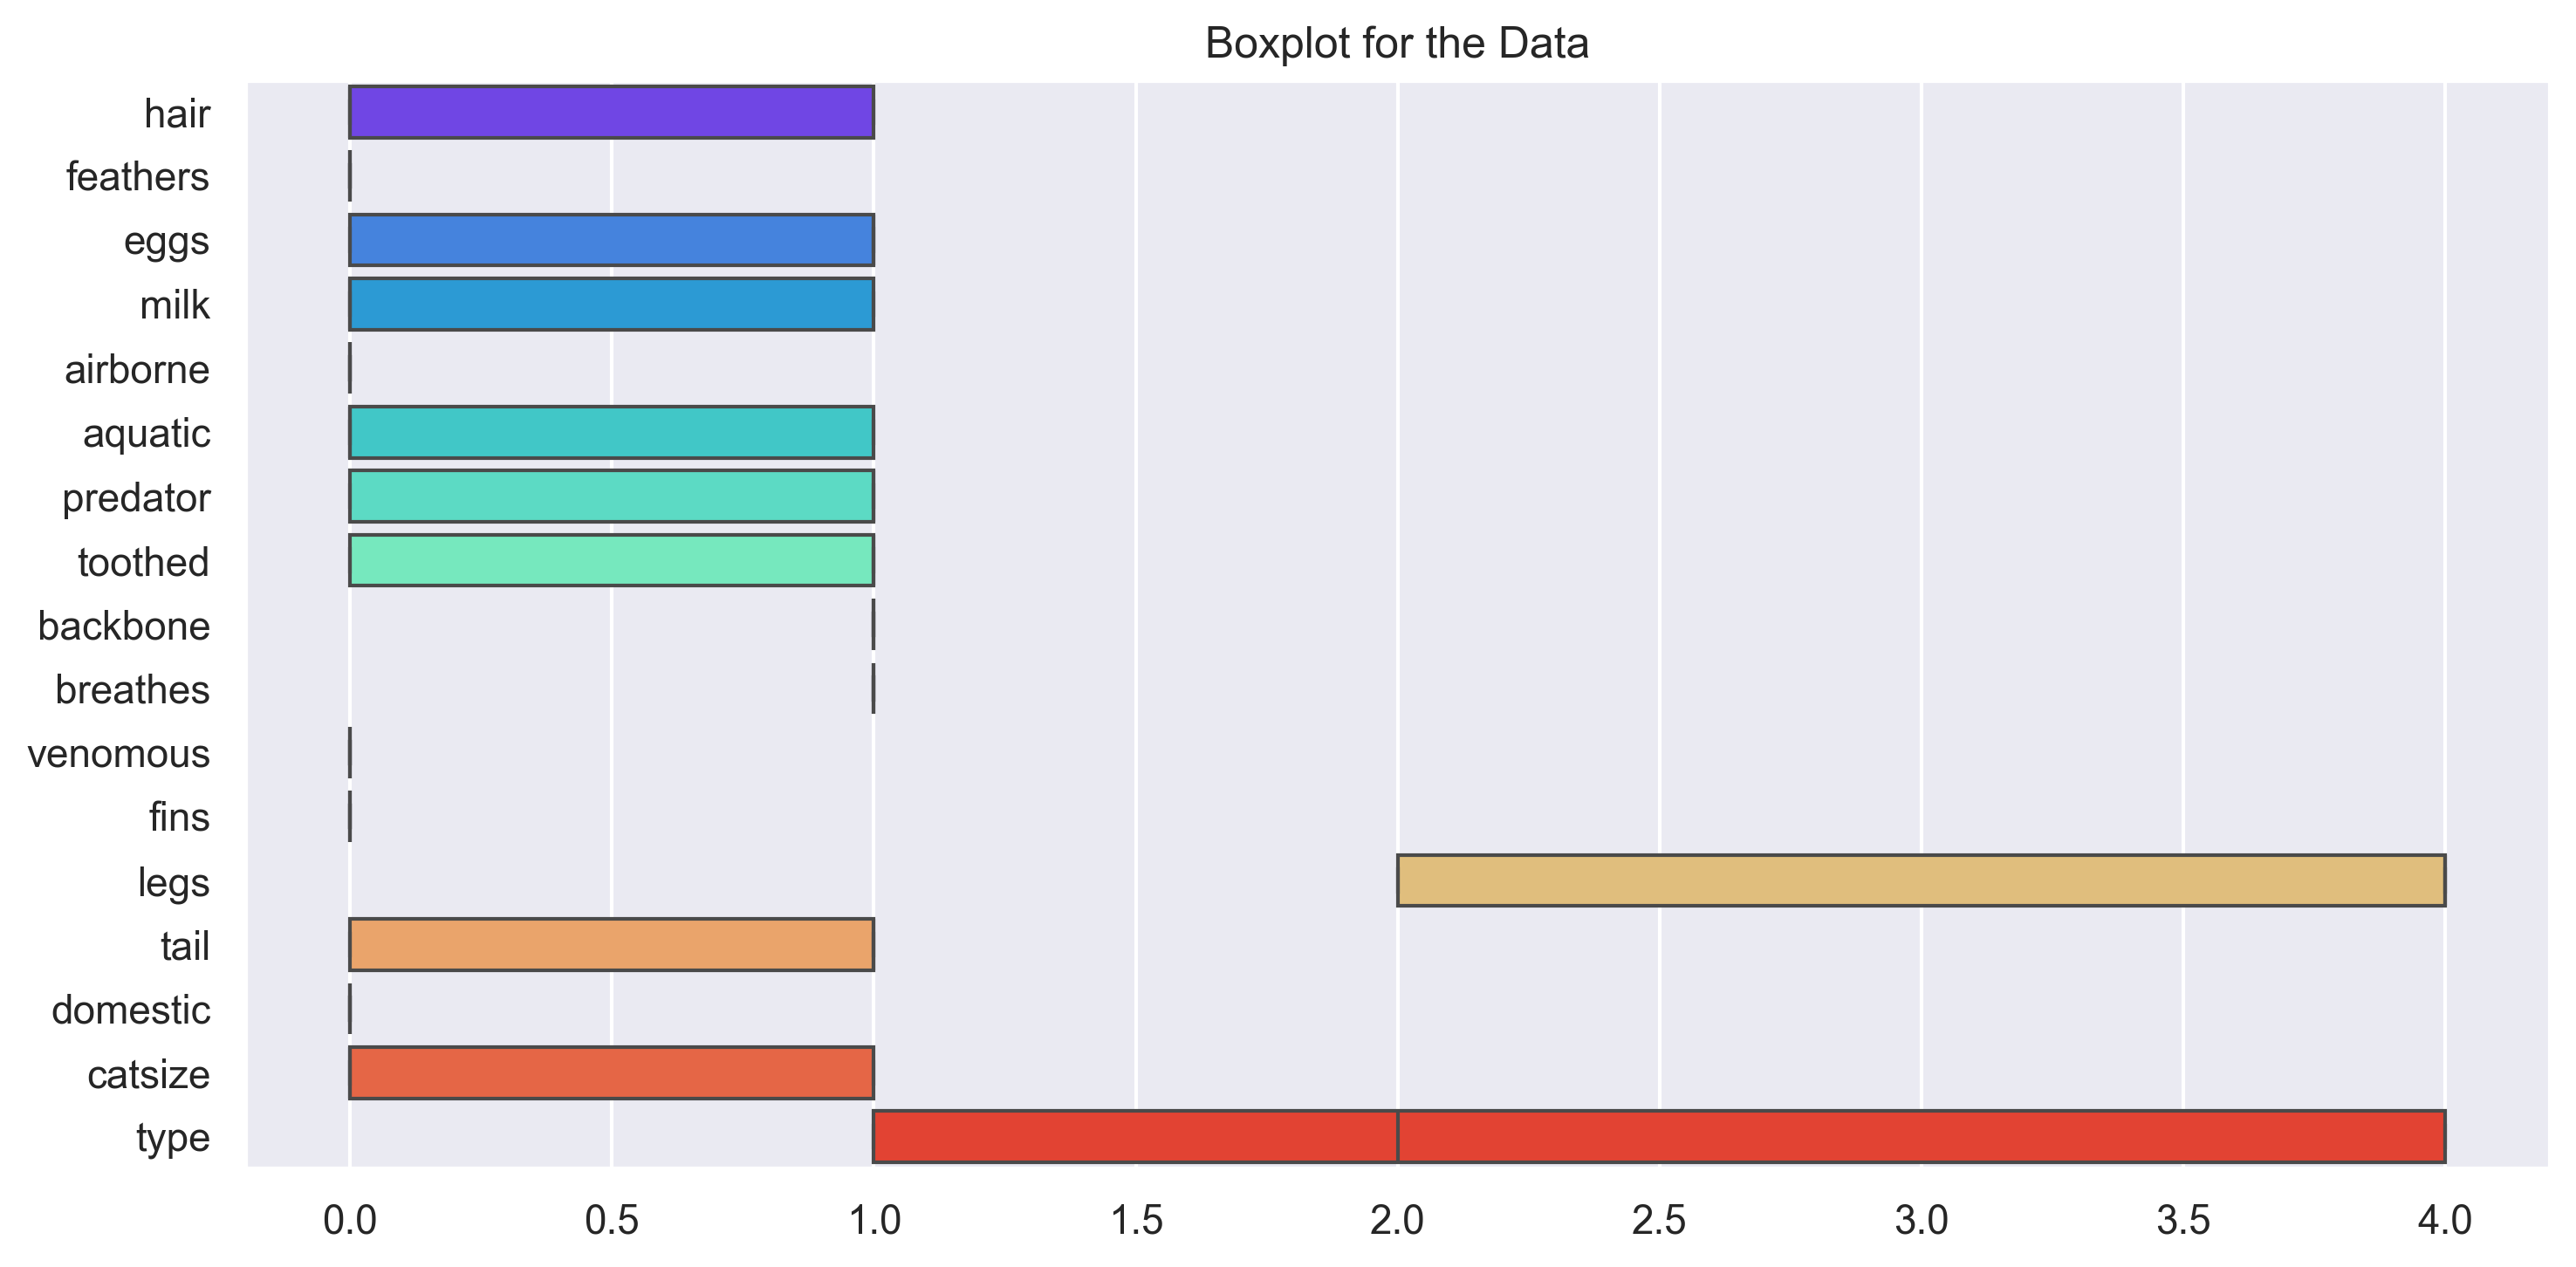

In [19]:
# Plotting Boxplot for the dataset to identify outliers.

sns.boxplot(data=zoo_df, orient='h', palette='rainbow')
plt.title('Boxplot for the Data')
plt.tight_layout()

- Dealt with Outliers by using Capping Method.

In [20]:
# Scaling the dataset using StandardScaler.

scaler = StandardScaler()   

scaled_data = scaler.fit_transform(zoo_df.drop(columns=['type']))
scaled_data = pd.DataFrame(scaled_data, columns=zoo_df.drop(columns=['type']).columns)

In [21]:
scaled_data['type'] = zoo_df['type']

In [22]:
scaled_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.990148,-1.698416,0.0,1.138180,1.0
1,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,0.990148,0.588784,0.0,1.138180,1.0
2,-0.861034,0.0,0.843721,-0.826640,0.0,1.343710,0.896421,0.809776,0.0,0.0,0.0,0.0,-1.009950,0.588784,0.0,-0.878595,4.0
3,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.990148,-1.698416,0.0,1.138180,1.0
4,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.990148,0.588784,0.0,1.138180,1.0


In [23]:
# Splitting the dataset into Features and Target variable (x & y).

x = scaled_data.drop(columns=['type'])
y = scaled_data['type']

In [24]:
# Splitting the dataset into Training and Testing sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Implementing KNN Model

In [28]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [29]:
y_pred

array([1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 4., 4., 4., 2., 4., 1., 1.,
       2., 4., 1., 4.])

In [30]:
knn.score(x_train,y_train), knn.score(x_test,y_test)

(0.975, 0.9523809523809523)

In [31]:
# Evaluating the model using Classification Report.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.86      1.00      0.92         6

    accuracy                           0.95        21
   macro avg       0.71      0.75      0.73        21
weighted avg       0.91      0.95      0.93        21



- The accuracy is very good by Considering 'K-value = 4'.

# Hyperparameter Tuning for KNN

- No need for Hyper-parameter tuning but doing it for knowledge purpose.

In [32]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

In [33]:
train_acc

[1.0,
 0.975,
 0.975,
 0.975,
 0.975,
 0.95,
 0.9125,
 0.9375,
 0.925,
 0.9,
 0.9,
 0.9,
 0.875,
 0.8875,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9]

In [34]:
test_acc

[0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.8571428571428571,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

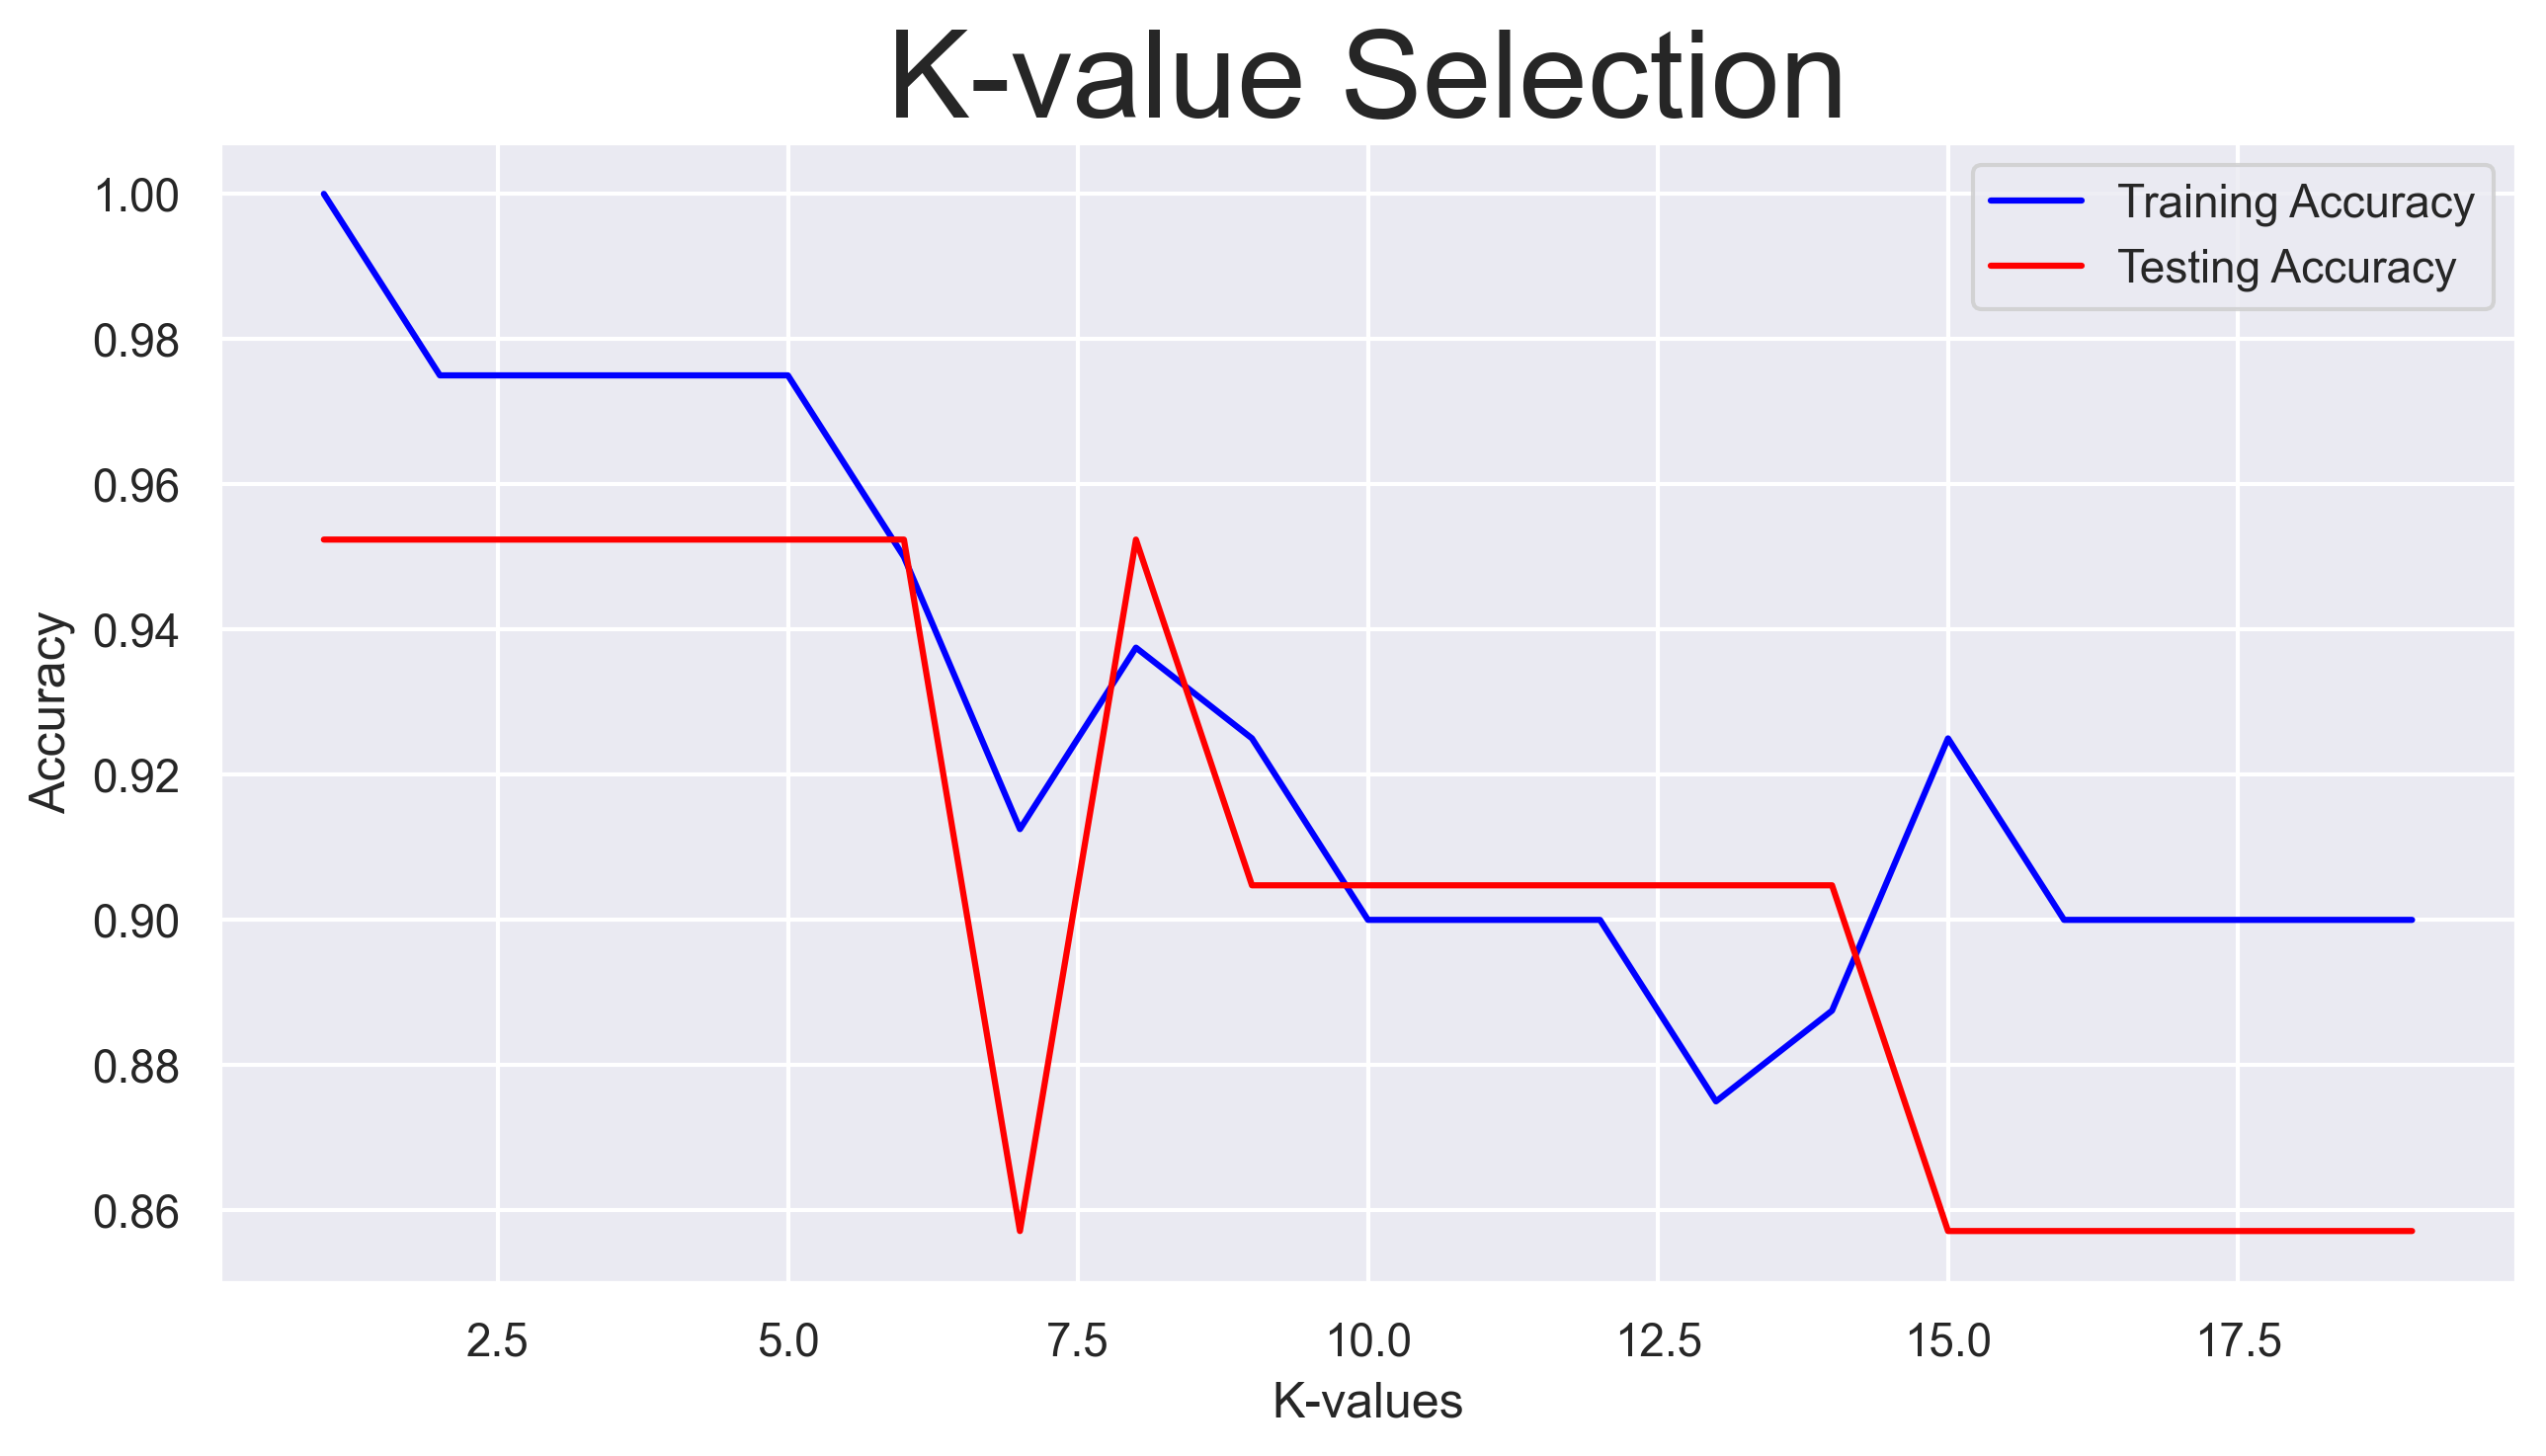

In [35]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

- The Testing Accuracy remains constant with 95 % on 'K-value = 2'.
- The Testing Accuracy changes with changes in K-value as seen in the Graph.

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
print(f"Train: {knn.score(x_train,y_train)}\nTest: {knn.score(x_test,y_test)}")

Train: 0.975
Test: 0.9523809523809523


# Visualizing the Decision Boundary for the Classifier using 2 Features

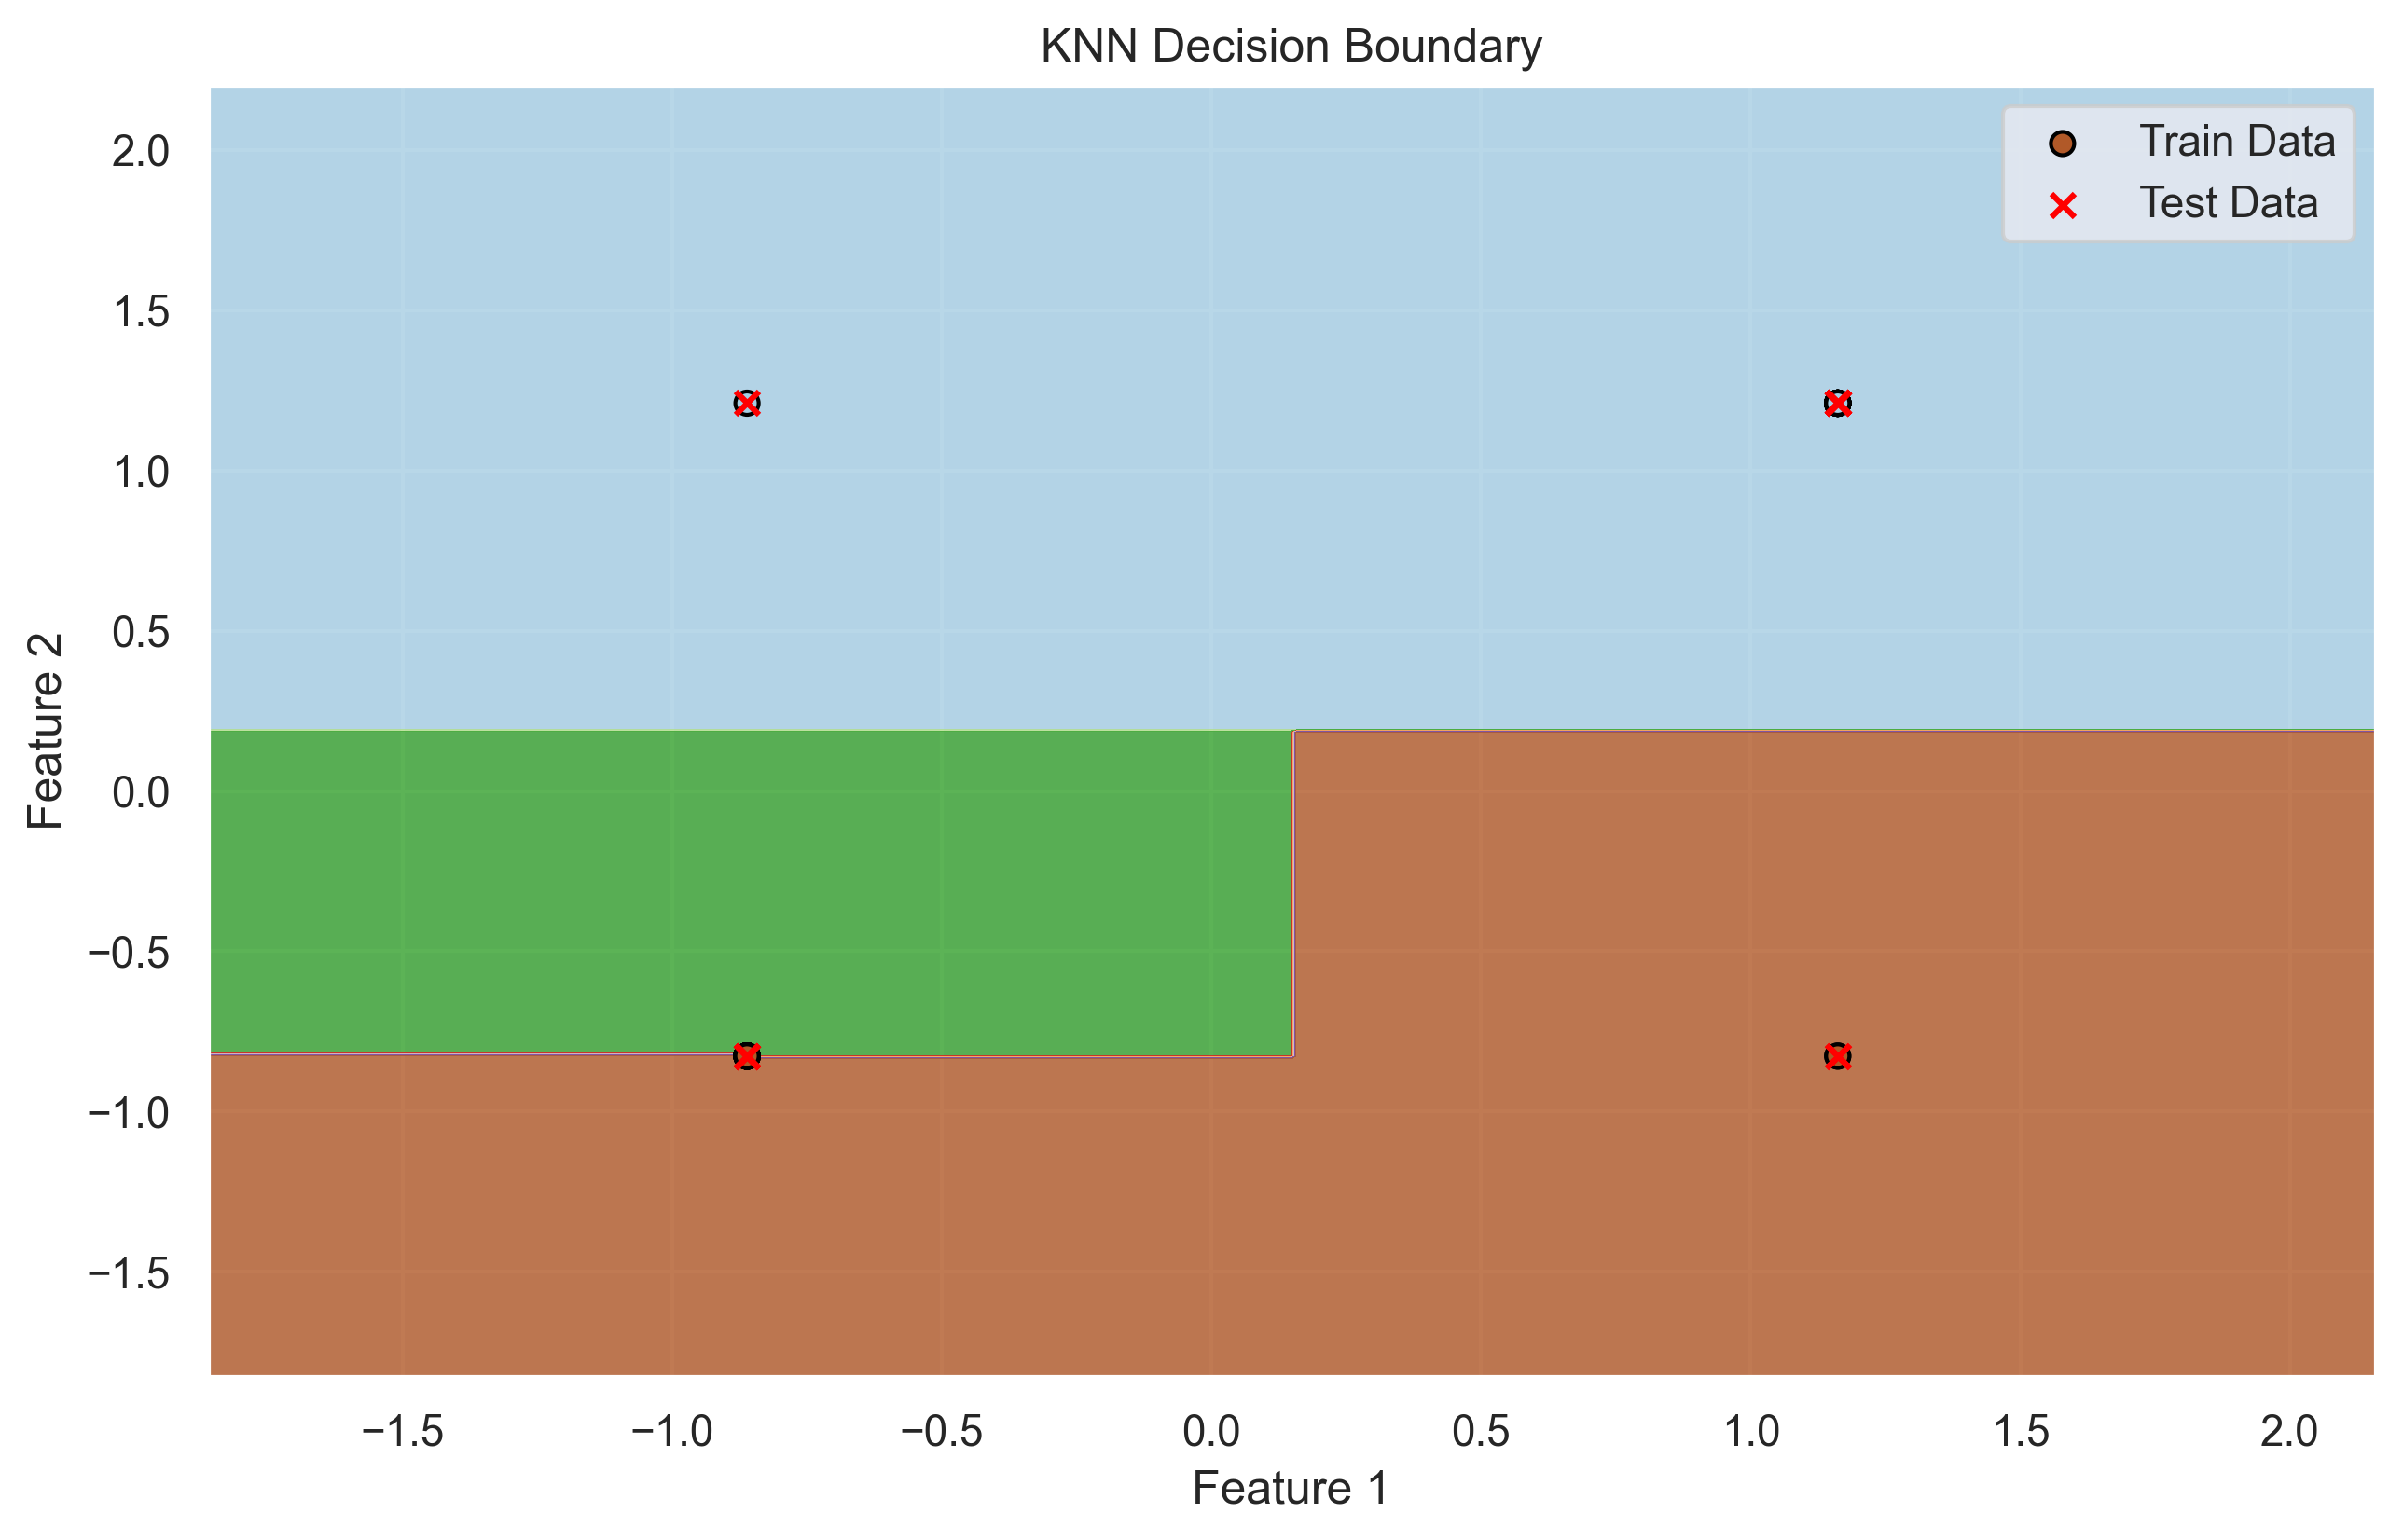

In [40]:
# Select only two features for training and plotting
x_train_2d = x_train[['hair', 'milk']]
x_test_2d = x_test[['hair', 'milk']]

# Fit the classifier (replace n_neighbors with your desired value)
knn = KNeighborsClassifier(n_neighbors=2)  # Adjust `n_neighbors` as needed
knn.fit(x_train_2d, y_train)

# Define the plot boundaries
x_min, x_max = x_train_2d.iloc[:, 0].min() - 1, x_train_2d.iloc[:, 0].max() + 1
y_min, y_max = x_train_2d.iloc[:, 1].min() - 1, x_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classifier output for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(x_train_2d.iloc[:, 0], x_train_2d.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired, marker='o', label='Train Data')
plt.scatter(x_test_2d.iloc[:, 0], x_test_2d.iloc[:, 1], c='red', edgecolor='k', marker='x', label='Test Data')
plt.title('KNN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Conclusion for the Above Graph

- The graph illustrates the decision boundary of the K-Nearest Neighbors (KNN) classifier using two features: 'hair' and 'milk'.
- The contour plot shows the regions classified into different animal types based on the KNN model.
- The training data points are represented by circles ('o') and the test data points by crosses ('x').
- The decision boundary effectively separates different classes, indicating that the KNN model is able to distinguish between different animal types based on the selected features.
- The red test data points mostly fall within the correct regions, suggesting that the model generalizes well to unseen data.

# Interview Questions

1. What are the key Hyper-parameters in KNN ?

- What are Hyper-parameters?

Hyper-parameters are parameters set before the learning process begins, as opposed to parameters learned from the data during training (e.g., weights in neural networks). They control the model's behavior and performance and must be tuned for optimal results. In K-Nearest Neighbors (KNN), hyper-parameters influence how the algorithm defines "neighbors" and calculates predictions.

- Key Hyper-parameters in KNN :

1. n_neighbors:

- The number of nearest neighbors to consider when making predictions.
- Lower values can lead to over-fitting, while higher values can smooth the decision boundary.

2. metric:

- The distance metric used to calculate the similarity between points (e.g., Euclidean, Manhattan, Minkowski).
- Different metrics can suit different datasets.

3. p:

- Relevant when metric='minkowski'. Determines the power parameter for the Minkowski distance.
- p=1 corresponds to Manhattan distance, and p=2 corresponds to Euclidean distance.

4. weights:

- Determines how the influence of neighbors is calculated. 
- Options:
i. 'uniform': All neighbors contribute equally.
ii. 'distance': Closer neighbors have a greater influence.

5. algorithm:

- The algorithm used to compute nearest neighbors. 
- Options:
'ball_tree', 'kd_tree', 'brute', or 'auto'.
- This impacts the computational efficiency depending on dataset size and dimensions.

6. leaf_size:

- Used in ball_tree or kd_tree algorithms to specify the leaf size. Affects query performance and memory usage.

7. n_jobs:

- Specifies the number of parallel jobs for computation.
- -1 uses all processors, speeding up the algorithm on large datasets.

- Conclusion :
Hyperparameter tuning is crucial for finding the best combination to balance accuracy and computational efficiency.

2. What are Distance Metrics?

- In K-Nearest Neighbors (KNN), distance metrics are mathematical measures used to compute the similarity or dissimilarity between two points in the feature space. 
- The choice of a distance metric directly influences how neighbors are identified and, consequently, the model's performance. 
- Different metrics may work better depending on the data's characteristics and scale.

-  Distance Metrics Used in KNN:

1. Euclidean Distance:
- The straight-line distance between two points.
- Formula: d = sqrt(sum((x_i - y_i)^2)) 
- Best suited for continuous data.
 
2. Manhattan Distance:
- The sum of absolute differences between coordinates (also called L1 distance).
- Formula: d = sum(|x_i - y_i|)
- Works well for grid-like data.
 
3. Minkowski Distance:
- A generalized distance metric that includes both Euclidean and Manhattan distances as special cases.
- Formula: d = (sum(|x_i - y_i|^p))^(1/p)
- p=1 gives Manhattan, p=2 gives Euclidean.

4. Chebyshev Distance:
- Measures the maximum absolute difference between dimensions.
- Formula: d = max(|x_i - y_i|)
- Useful in scenarios where the largest difference is critical.
 
5. Hamming Distance:
- The number of positions at which two vectors differ.
- Commonly used for categorical or binary data.

6. Cosine Similarity (converted to distance):
- Measures the cosine of the angle between two vectors in a high-dimensional space.
- Distance is computed as d = 1 - cosine similarity.
- Effective for text or high-dimensional sparse data.

7. Mahalanobis Distance:
- Accounts for the correlations between variables and scales them appropriately.
- Formula: d = sqrt((x-y)^T S^(-1) (x-y)), where S is the covariance matrix.
- Useful for datasets with varying scales or correlated features.

8. Bray-Curtis Distance:
- Measures dissimilarity based on the ratio of differences to the sum of values.
- Commonly used in ecological or compositional data.

- Selecting the right distance metric depends on the nature of the dataset and he problem you're solving. 
- For numerical data, Euclidean or Manhattan is common, while Hamming or Cosine is better for categorical or sparse data.


# Comparison of KNN and K-Means Clustering

| Feature               | KNN                          | K-Means Clustering          |
|-----------------------|------------------------------|-----------------------------|
| **Type of Algorithm** | Supervised Learning          | Unsupervised Learning       |
| **Objective**         | Classification/Regression    | Clustering (grouping data)  |
| **Labeled Data Required** | Yes                      | No                          |
| **Output**            | Class labels for input data  | Cluster centers and labels  |
| **Approach**          | Instance-based               | Centroid-based              |
| **Distance Metric**   | Customizable (e.g., Euclidean, Manhattan, etc.) | Typically Euclidean         |
| **Training Phase**    | None (lazy learner)          | Yes (iterative optimization)|
| **Prediction Phase**  | Requires labeled data        | Assigns clusters to data    |
| **Application Examples** | Spam detection, recommendation systems | Customer segmentation, image compression |
